# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import time
import cv2

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file = '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_org, y_train_org = train['features'], train['labels']
X_valid_org, y_valid_org = valid['features'], valid['labels']
X_test_org, y_test_org = test['features'], test['labels']

assert(len(X_train_org) == len(y_train_org))
assert(len(X_valid_org) == len(y_valid_org))
assert(len(X_test_org) == len(y_test_org))

print()
print("Image Shape: {}".format(X_train_org[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train_org)))
print("Validation Set: {} samples".format(len(X_valid_org)))
print("Test Set:       {} samples".format(len(X_test_org)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [117]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_org)

# TODO: Number of validation examples
n_validation = len(X_valid_org)

# TODO: Number of testing examples.
n_test = len(X_test_org)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_org[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train_org))

print("Number of training examples =", n_train)
print("Number of training examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of training examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

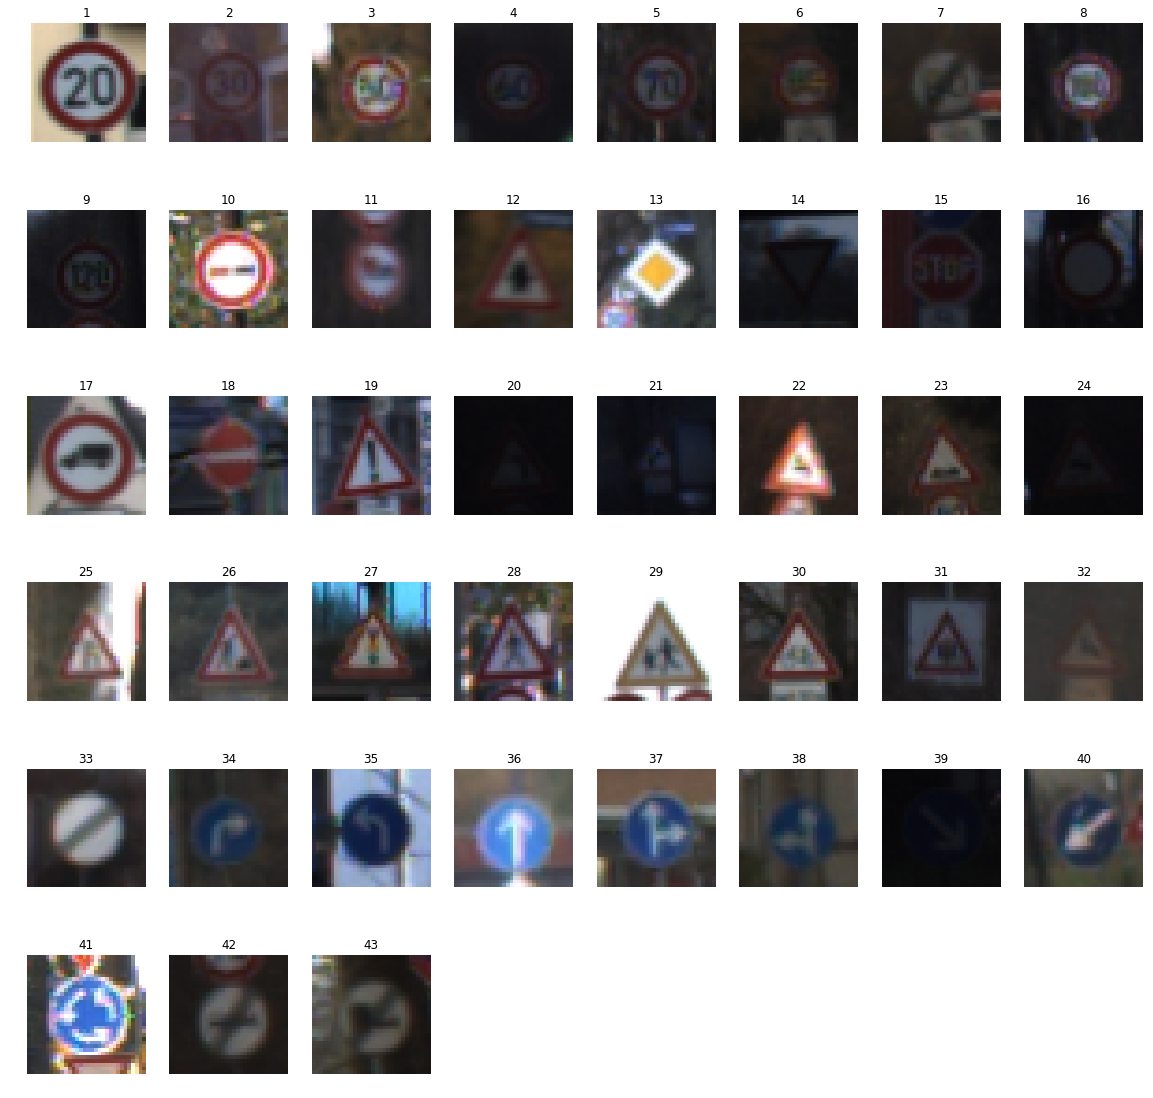

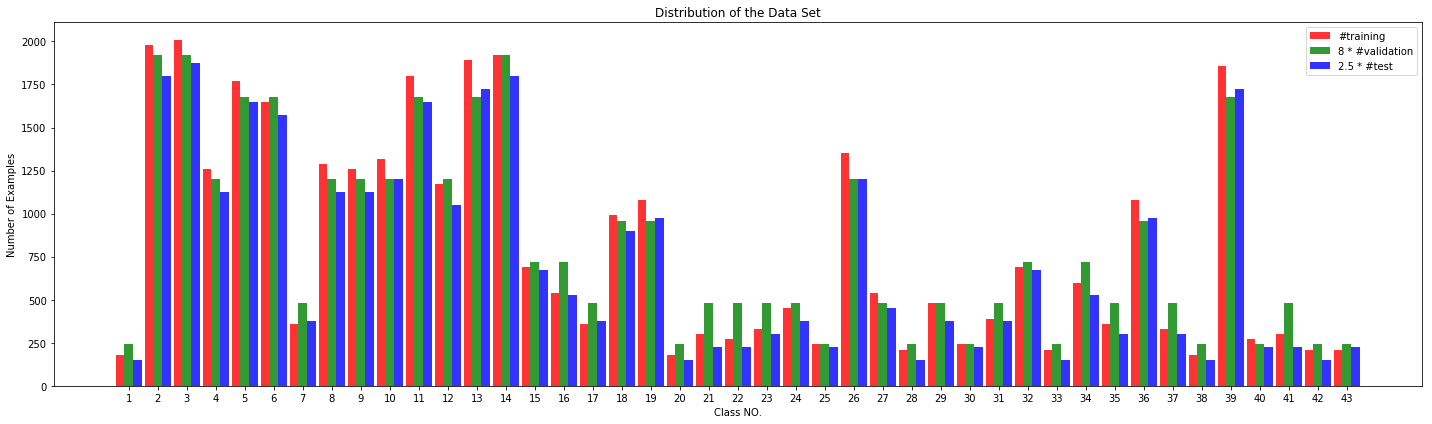

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

list_train_class_count = list()
list_valid_class_count = list()
list_test_class_count = list()

# plot one training example for each class
plt.figure(figsize=[20,20])
for class_id in range(1, n_classes+1):
    train_class_selected = X_train_org[y_train_org == class_id-1]
    #print(train_class_selected.shape)
    list_train_class_count.append(len(train_class_selected))
    
    valid_class_selected = X_valid_org[y_valid_org == class_id-1]
    list_valid_class_count.append(len(valid_class_selected)*8)
    
    test_class_selected = X_test_org[y_test_org == class_id-1]
    list_test_class_count.append(len(test_class_selected)*2.5)
    
    plt.subplot(np.ceil(n_classes/8), 8, class_id)
    plt.imshow(train_class_selected[0,])
    plt.title(class_id)
    plt.axis('off')

# plot the number of training examples for each class
plt.figure(figsize=[20, 6])
index = np.arange(n_classes)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, list_train_class_count, bar_width, alpha = opacity, color = 'r', label = '#training')
rects2 = plt.bar(index+bar_width, list_valid_class_count, bar_width, alpha = opacity, color = 'g', label = '8 * #validation')
rects3 = plt.bar(index+bar_width*2, list_test_class_count,bar_width, alpha = opacity, color = 'b', label = '2.5 * #test')

plt.xticks(index + bar_width, range(1, n_classes+1))
plt.title("Distribution of the Data Set")
plt.xlabel("Class NO.")
plt.ylabel("Number of Examples")
plt.legend()
plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def data_preprocess_RGB2gray(X_train, X_valid, X_test):
    X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
    X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
    X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

    return X_train_gray, X_valid_gray, X_test_gray

In [6]:
def data_preprocess_normalize(X_train, X_valid, X_test):
    X_train_normalized = (X_train - 128) / 128
    X_valid_normalized = (X_valid - 128) / 128
    X_test_normalized = (X_test - 128) / 128
    
    return X_train_normalized, X_valid_normalized, X_test_normalized

In [118]:
def compare_images(img1, img2):
    # print("Size of the original image and the new image are {}, {}, respectively.".format(img1.shape, img2.shape))
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(img1.squeeze(), cmap='gray')
    ax[0].set_title("Original image")

    ax[1].imshow(img2.squeeze(), cmap='gray')
    ax[1].set_title("New Image")
    
    plt.tight_layout()

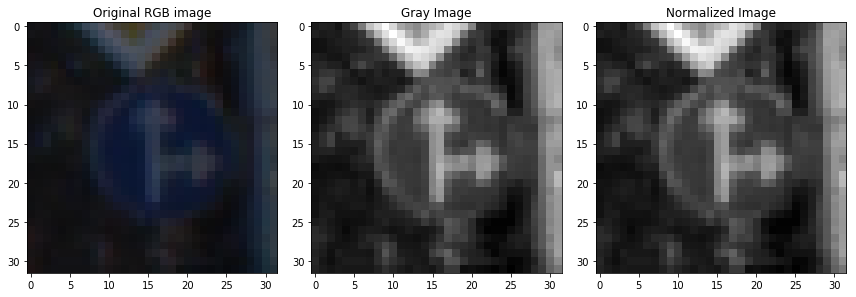

In [127]:
img1 = X_train_org[1000]
img2 = np.sum(img1/3, axis=2, keepdims=True)
img3 = (img2 - 128) / 128

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 14))
ax = axes.ravel()

ax[0].imshow(img1.squeeze())
ax[0].set_title("Original RGB image")

ax[1].imshow(img2.squeeze(), cmap='gray')
ax[1].set_title("Gray Image")

ax[2].imshow(img3.squeeze(), cmap='gray')
ax[2].set_title("Normalized Image")

plt.tight_layout()

### Model Architecture

<figure>
 <img src="examples/LeNetModel.png" width="800" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Original LeNet Network </p> 
 </figcaption>

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x, mu, sigma):        
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
def evaluate(X_data, y_data, x, y, accuracy_operation, BATCH_SIZE):      
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [9]:
## training pipeline
def training_pipeline(logits, x, y, X_train, y_train, X_valid, y_valid, hyperparameter):
    rate = hyperparameter['rate']
    EPOCHS = hyperparameter['EPOCHS']
    BATCH_SIZE = hyperparameter['BATCH_SIZE']
    mu = hyperparameter['mu']
    sigma = hyperparameter['sigma']
    
    ## training pipeline
    ## Create a training pipeline that uses the model to classify traffic sign
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = one_hot_y, logits = logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    ## model evaluation
    ## Evaluate how well the loss and accuracy of the model for a given dataset.
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()
    
    ## train the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        start_time = time.time()
        print()
        row_format = "{:>20}" * 4
        print(row_format.format("EPOCH", "Training_Accuracy", "Validation_Accuracy", "Time_Cost (s)"))
        row_format = "{:>20}{:>20.3f}{:>20.3f}{:>20.1f}"
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            train_accuracy = evaluate(X_train, y_train, x, y, accuracy_operation, BATCH_SIZE)
            validation_accuracy = evaluate(X_valid, y_valid, x, y, accuracy_operation, BATCH_SIZE)
            
            end_time = time.time()
            print(row_format.format(i+1, train_accuracy, validation_accuracy, end_time-start_time))
            
            #print("EPOCH {} ...".format(i+1))
            #print("Training Accurary = {:.3f} while Validation Accuracy = {:.3f}".format(train_accuracy, validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")
    
    
    ## Evaluate the Model
    # Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test, x, y, accuracy_operation, BATCH_SIZE)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

#### Run the Instance

In [10]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

In [11]:
X_train, X_valid, X_test = data_preprocess_RGB2gray(X_train_org, X_valid_org, X_test_org)
X_train, X_valid, X_test = data_preprocess_normalize(X_train, X_valid, X_test)

y_train, y_valid, y_test = y_train_org, y_valid_org, y_test_org

In [12]:
## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, hypar['mu'], hypar['sigma'])

In [13]:
training_pipeline(logits, x, y, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.835               0.743                25.8

                   2               0.922               0.848                52.8

                   3               0.959               0.876                78.6

                   4               0.971               0.889               104.2

                   5               0.977               0.894               129.8

                   6               0.980               0.909               156.7

                   7               0.989               0.905               182.7

                   8               0.985               0.897               208.2

                   9               0.989               0.908               234.3

                  10               0.992               0.921               260.1

                  11               0.994               0.907               285.5

    

## Step 2.1 Analysis and Improvement -- Computational Speed

First of all, it costs much time (around 600s) for the traning process, even if we don't do any data augumentation, increase the epoch number nor use any more complex model. Hence, the first thing that I would like to try is to shorten the training time by optimizing the model architecture. Accoding to the Deep Learning course of Porf. Andrew Ng, we can turn the fully-connected layers into convolutional layers to save training time.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet_v2(x, mu, sigma):        
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

#     # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
#     fc0   = flatten(conv2)
    
#     # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
#     # SOLUTION: Activation.
#     fc1    = tf.nn.relu(fc1)

#     # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
#     fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
#     fc2_b  = tf.Variable(tf.zeros(84))
#     fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
#     # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(n_classes))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b

    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 1x1x120.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 120), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(120))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Layer 4: Convolutional. Input = 1x1x120. Output = 1x1x84.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 120, 84), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(84))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Layer 5: Convolutional. Input = 1x1x84. Output = 1x1x43.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 84, n_classes), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(n_classes))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # SOLUTION: Flatten. Input = 1x1x43. Output = 43.
    logits   = flatten(conv5)

    return logits


In [15]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

In [16]:
X_train, X_valid, X_test = data_preprocess_RGB2gray(X_train_org, X_valid_org, X_test_org)
X_train, X_valid, X_test = data_preprocess_normalize(X_train, X_valid, X_test)

y_train, y_valid, y_test = y_train_org, y_valid_org, y_test_org

In [17]:
## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet_v2(x, hypar['mu'], hypar['sigma'])

In [18]:
training_pipeline(logits, x, y, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.838               0.753                28.5

                   2               0.939               0.863                56.9

                   3               0.959               0.866                85.7

                   4               0.974               0.895               113.8

                   5               0.980               0.888               142.2

                   6               0.978               0.895               170.4

                   7               0.988               0.907               198.7

                   8               0.989               0.910               227.0

                   9               0.992               0.916               255.2

                  10               0.990               0.905               283.4

                  11               0.992               0.904               311.6

    

**Personal Notes**
1. It seems that the time cost is almost the same as before. Converting fully connected networks to convolutional networks may be helpful for the case of convolution implementation of sliding windows, but are not helpful in our case.
2. It is suprisingly to see that the validation and test accurary are improved a little bit.

## Step 2.2 Analysis and Improvement -- Over Fitting

The accuracy for the training set is over 0.99, however, the accuracy for the validation set is only around 0.9. This is the overfitting problem. And there are several things that we can try:
* Regularization. For example, drop out
* Data augumentation. To introduce more data for training
* Data preprocess. Take full advantage of computer vision technologies to highlight features of images


### Drop out regularization

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet_v3(x, keep_prob, mu, sigma):        
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # Dropout
    #conv1    = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout
    #conv2    = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') 

#     # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
#     fc0   = flatten(conv2)
    
#     # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
#     fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
#     # SOLUTION: Activation.
#     fc1    = tf.nn.relu(fc1)
    
#     # Dropout
#     fc1    = tf.nn.dropout(fc1, keep_prob)

#     # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
#     fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
#     fc2_b  = tf.Variable(tf.zeros(84))
#     fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
#     # SOLUTION: Activation.
#     fc2    = tf.nn.relu(fc2)
    
#     # Dropout
#     fc2    = tf.nn.dropout(fc2, keep_prob)

#     # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
#     fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
#     fc3_b  = tf.Variable(tf.zeros(n_classes))
#     logits = tf.matmul(fc2, fc3_W) + fc3_b

    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 1x1x120.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 120), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(120))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Dropout
    conv3    = tf.nn.dropout(conv3, keep_prob)

    # SOLUTION: Layer 4: Convolutional. Input = 1x1x120. Output = 1x1x84.
    conv4_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 120, 84), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(84))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    
    # SOLUTION: Activation.
    conv4 = tf.nn.relu(conv4)
    
    # Dropout
    conv4    = tf.nn.dropout(conv4, keep_prob)
    
    # SOLUTION: Layer 5: Convolutional. Input = 1x1x84. Output = 1x1x43.
    conv5_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 84, n_classes), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(n_classes))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    
    # SOLUTION: Flatten. Input = 1x1x43. Output = 43.
    logits   = flatten(conv5)
    
    return logits


In [20]:
def evaluate(X_data, y_data, x, y, keep_prob, accuracy_operation, BATCH_SIZE):      
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
## training pipeline
def training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hyperparameter):
    rate = hyperparameter['rate']
    EPOCHS = hyperparameter['EPOCHS']
    BATCH_SIZE = hyperparameter['BATCH_SIZE']
    mu = hyperparameter['mu']
    sigma = hyperparameter['sigma']
    
    ## training pipeline
    ## Create a training pipeline that uses the model to classify traffic sign
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = one_hot_y, logits = logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    ## model evaluation
    ## Evaluate how well the loss and accuracy of the model for a given dataset.
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()
    
    ## train the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        start_time = time.time()
        print()
        row_format = "{:>20}" * 4
        print(row_format.format("EPOCH", "Training_Accuracy", "Validation_Accuracy", "Time_Cost (s)"))
        row_format = "{:>20}{:>20.3f}{:>20.3f}{:>20.1f}"
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})

            train_accuracy = evaluate(X_train, y_train, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
            validation_accuracy = evaluate(X_valid, y_valid, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
            
            end_time = time.time()
            print(row_format.format(i+1, train_accuracy, validation_accuracy, end_time-start_time))
            
            #print("EPOCH {} ...".format(i+1))
            #print("Training Accurary = {:.3f} while Validation Accuracy = {:.3f}".format(train_accuracy, validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")
    
    
    ## Evaluate the Model
    # Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [22]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

# Preprocess
X_train, X_valid, X_test = data_preprocess_RGB2gray(X_train_org, X_valid_org, X_test_org)
X_train, X_valid, X_test = data_preprocess_normalize(X_train, X_valid, X_test)

y_train, y_valid, y_test = y_train_org, y_valid_org, y_test_org

## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = LeNet_v3(x, keep_prob, hypar['mu'], hypar['sigma'])

In [23]:
training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.616               0.547                28.8

                   2               0.866               0.819                57.5

                   3               0.924               0.881                85.8

                   4               0.947               0.904               114.6

                   5               0.955               0.914               143.4

                   6               0.969               0.929               172.1

                   7               0.977               0.937               200.8

                   8               0.981               0.942               230.7

                   9               0.983               0.944               259.0

                  10               0.985               0.941               287.7

                  11               0.987               0.948               316.4

    

### Data Augmentation
refer to the article [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)
and the paper [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

Useful image processing techniques: (refer to [Geometric Transformation of Images via OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html) and [Geometric Image Transformations with OpenCV](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?))
* **Translation**: Translation is the shifting of object’s location. Translation just involves moving the image along the X or Y direction (or both). This method of augmentation is very useful as most objects can be located at almost anywhere in the image. This forces your convolutional neural network to look everywhere.
* **scale**: Scaling is just resizing of the image.
* **warp**
* **brightness**

In [24]:
X_train_gray, X_valid_gray, X_test_gray = data_preprocess_RGB2gray(X_train_org, X_valid_org, X_test_org)
y_train, y_valid, y_test = y_train_org, y_valid_org, y_test_org

In [26]:
import os

output_dir = "test_images_output/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [28]:
import matplotlib.image as mpimg

def compare_images_v1(img1, img2):
    print("Size of the original image and the new image are {}, {}, respectively.".format(img1.shape, img2.shape))
    
    plt.subplot(1,2,1)
    plt.imshow(img1.squeeze(), cmap = 'gray')
    plt.title("Original Image")
    plt.axis('Off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2.squeeze(), cmap = 'gray')
    plt.title("New Image")
    plt.axis('Off')
    
def save_images(img, img_name):
    mpimg.imsave(arr = img, fname = output_dir+img_name)

#### Transition
* **warpAffine**: Applies an affine transformation to an image.
  * cv2.WarpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
  * Parameters:
    * src – input image.
    * dst – output image that has the size dsize and the same type as src .
    * M – $2\times 3$ transformation matrix.
    * dsize – size of the output image.
    * flags – combination of interpolation methods (see resize() ) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( \texttt{dst}\rightarrow\texttt{src} ).
    * borderMode – pixel extrapolation method (see borderInterpolate()); when borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.
    * borderValue – value used in case of a constant border; by default, it is 0.
  * The function warpAffine transforms the source image using the specified matrix:
$$\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})$$
when the flag WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invertAffineTransform() and then put in the formula above instead of M . The function cannot operate in-place.

In [29]:
def img_translation_random(img_org, pixel_limit = 2):
    img = img_org.copy()
    height, width, _ = img.shape
    
    pixel_x, pixel_y = np.random.randint(-pixel_limit, pixel_limit, 2)
    
    M = np.float32([[1,0,pixel_x],[0,1,pixel_y]])
    img_new = cv2.warpAffine(img, M, (height, width))
    
    img_new = img_new[:,:,np.newaxis]
    
    return img_new

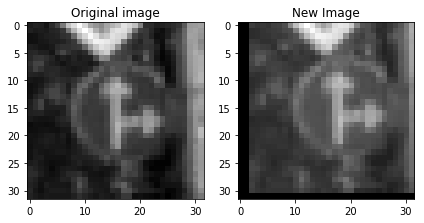

In [30]:
img1 = X_train_gray[1000]
img2 = img_translation_random(img1, pixel_limit = 5)
compare_images(img1, img2)

In [37]:
save_images(img1[:,:,0], 'original.png')
save_images(img2[:,:,0], 'translation.png')

#### Scale
* **getPerspectiveTransform**: Calculates a perspective transform from four pairs of the corresponding points.
  * cv2.getPerspectiveTransform(src, dst) → retval
  * Parameters:
    * src – Coordinates of quadrangle vertices in the source image.
    * dst – Coordinates of the corresponding quadrangle vertices in the destination image.
  * The function calculates the $3 \times 3$ matrix of a perspective transform so that:
$$\begin{bmatrix} t_i x'_i \\ t_i y'_i \\ t_i \end{bmatrix} = \texttt{map\_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}$$
where
$$dst(i)=(x'_i,y'_i),
src(i)=(x_i, y_i),
i=0,1,2,3$$

* **warpPerspective**: Applies a perspective transformation to an image.
  * cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
  * Parameters:
    * src – input image.
    * dst – output image that has the size dsize and the same type as src .
    * M – $3\times 3$ transformation matrix.
    * dsize – size of the output image.
    * flags – combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets M as the inverse transformation ( \texttt{dst}\rightarrow\texttt{src} ).
    * borderMode – pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
    * borderValue – value used in case of a constant border; by default, it equals 0.
  * The function warpPerspective transforms the source image using the specified matrix:
$$\texttt{dst} (x,y) =  \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} ,
     \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )$$
when the flag WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invert() and then put in the formula above instead of M . The function cannot operate in-place.

In [38]:
def img_scaling_random(img_org, pixel_limit = 2):
    img = img_org.copy()
    height, width, _ = img.shape
    
    pixel = np.random.randint(-pixel_limit, pixel_limit)
    
    # source coordinates (4 corners)
    src_crd = np.float32([[pixel,pixel],[height-pixel,pixel],[pixel,width-pixel],[height-pixel,width-pixel]])
    
    # destination coordinates (4 corners)
    dst_crd = np.float32([[0,0],[height,0],[0,width],[height,width]])    
    
    M = cv2.getPerspectiveTransform(src_crd, dst_crd)
    
    img_new = cv2.warpPerspective(img, M, (height,width))
    
    img_new = img_new[:,:,np.newaxis]
    
    return img_new

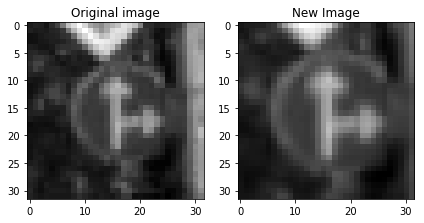

In [39]:
img1 = X_train_gray[1000]
img2 = img_scaling_random(img1, pixel_limit = 10)
compare_images(img1, img2)

In [40]:
save_images(img2[:,:,0], 'scaling.png')

#### Warp
* **getAffineTransform**: Calculates an affine transform from three pairs of the corresponding points.
  * cv2.getAffineTransform(src, dst) → retval
  * Parameters:
    * src – Coordinates of triangle vertices in the source image.
    * dst – Coordinates of the corresponding triangle vertices in the destination image.
    
  * The function calculates the $2 \times 3$ matrix of an affine transform so that:
$$\begin{bmatrix} x'_i \\ y'_i \end{bmatrix} = \texttt{map\_matrix} \cdot \begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}$$
where
$$dst(i)=(x'_i,y'_i),\ 
src(i)=(x_i, y_i),\ 
i=0,1,2$$

* **warpAffine**: Applies an affine transformation to an image.
  * cv2.WarpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
  * Parameters:
    * src – input image.
    * dst – output image that has the size dsize and the same type as src .
    * M – $2\times 3$ transformation matrix.
    * dsize – size of the output image.
    * flags – combination of interpolation methods (see resize() ) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( \texttt{dst}\rightarrow\texttt{src} ).
    * borderMode – pixel extrapolation method (see borderInterpolate()); when borderMode=BORDER_TRANSPARENT , it means that the pixels in the destination image corresponding to the “outliers” in the source image are not modified by the function.
    * borderValue – value used in case of a constant border; by default, it is 0.
  * The function warpAffine transforms the source image using the specified matrix:
$$\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})$$
when the flag WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted with invertAffineTransform() and then put in the formula above instead of M . The function cannot operate in-place.

In [41]:
def img_warp_random(img_org, warp_limit = 0.05):
    img = img_org.copy()
    height, width, _ = img.shape
    
    # random warp coefficients
    rndx = (np.random.rand(3) - 0.5) * width * warp_limit
    rndy = (np.random.rand(3) - 0.5) * height * warp_limit
    
    # starting points to warp
    x1, x2, y1, y2 = width/4, 3*width/4, height/4, 3*height/4

    # source coordinates (4 corners)
    src_crd = np.float32([[y1,x1], [y2,x1], [y1,x2]])
    
    # destination coordinates (4 corners)
    dst_crd = np.float32([[y1+rndy[0],x1+rndx[0]], [y2+rndy[1],x1+rndx[1]], [y1+rndy[2],x2+rndx[2]]])
    
    M = cv2.getAffineTransform(src_crd, dst_crd)
    
    img_new = cv2.warpAffine(img, M, (height,width))
    
    img_new = img_new[:,:,np.newaxis]
    
    return img_new

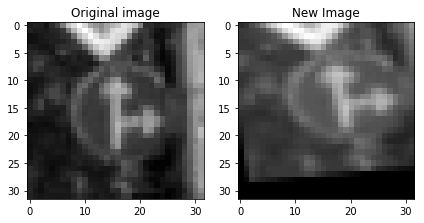

In [42]:
img1 = X_train_gray[1000]
img2 = img_warp_random(img1, warp_limit = 0.2)
compare_images(img1, img2)

In [43]:
save_images(img2[:,:,0], 'warp.png')

#### Brightness

In [44]:
def img_brightness_random(img_org, brightness_limit = 1.0):
    img = img_org.copy()
    height, width, _ = img.shape
    
    img_shifted = img + brightness_limit
    img_shifted_max_val = max(img_shifted.flatten())
    
    coef_max = 2.0/img_shifted_max_val
    coef_min = coef_max - 0.1
    
    coef = np.random.uniform(coef_min, coef_max)
    
    img_new = img_shifted * coef - brightness_limit
    return img_new

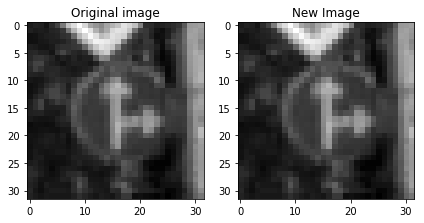

In [45]:
img1 = X_train_gray[1000]
img2 = img_brightness_random(img1, brightness_limit = 10.0)
compare_images(img1, img2)

In [46]:
save_images(img2[:,:,0], 'brightness.png')

#### Data Augmentation

In [47]:
def plt_histogram(X_data, y_data):
    
    n_classes = len(np.unique(y_data)) 
    
    list_data_classified_count = list()
    
    for class_id in range(1, n_classes+1):
        data_classified_selected = X_data[y_data == class_id-1]
        list_data_classified_count.append(len(data_classified_selected))
        
    # plot the number of training examples for each class
    plt.figure(figsize=[20, 6])
    index = np.arange(n_classes)
    bar_width = 0.5
    opacity = 0.8
    
    rects = plt.bar(index, list_data_classified_count, bar_width, alpha = opacity, color = 'b', label = '#training')
    
    plt.xticks(index, range(1, n_classes+1))
    plt.title("Distribution of the Data Set")
    plt.xlabel("Class NO.")
    plt.ylabel("Number of Examples")
    plt.legend()
    plt.tight_layout()
    plt.show()

X, y shapes: (34799, 32, 32, 1) (34799,)


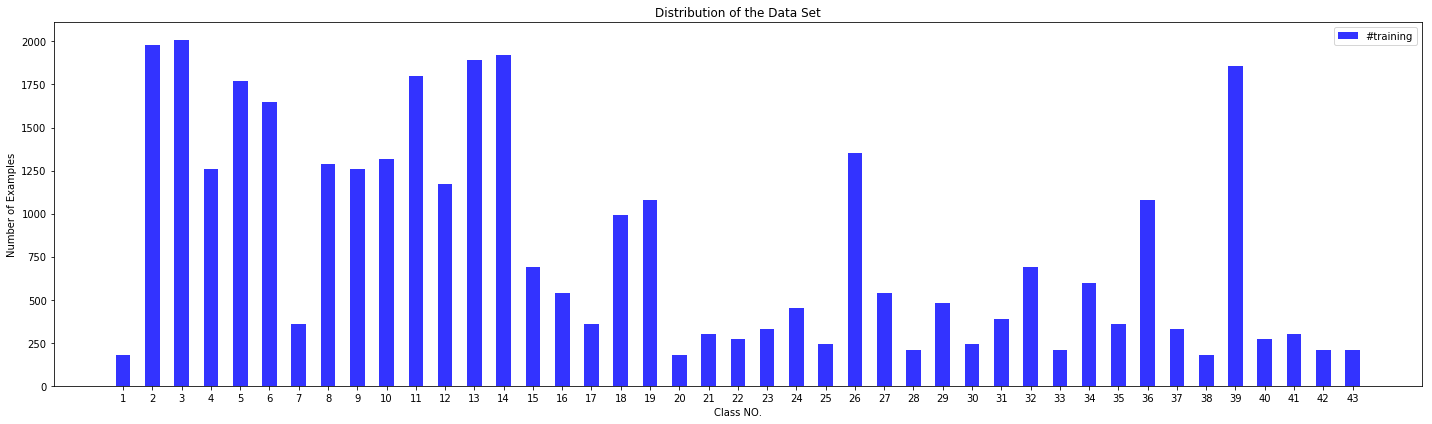

In [48]:
# Preprocess
X_train, X_valid, X_test = data_preprocess_RGB2gray(X_train_org, X_valid_org, X_test_org)
X_train, X_valid, X_test = data_preprocess_normalize(X_train, X_valid, X_test)

y_train, y_valid, y_test = y_train_org, y_valid_org, y_test_org

print('X, y shapes:', X_train.shape, y_train.shape)

plt_histogram(X_train, y_train)

In [49]:
min_data_num = 1500
img_example_pre = dict()
img_example_post = dict()

for class_id in range(1, n_classes+1):
    
    print(class_id, ': ', end='')
    
    class_indices = np.where(y_train == class_id-1)
    class_samples = len(class_indices[0])
    
    if class_samples < min_data_num:
        for i in range(min_data_num - class_samples):
            img = X_train[class_indices[0][i % class_samples]]
            
            if i == 1:
                img_example_pre[class_id] = img
                
            img_new = img_translation_random(img)
            img_new = img_scaling_random(img_new)
            img_new = img_warp_random(img_new)
            img_new = img_brightness_random(img_new)
            
            if i == 1:
                img_example_post[class_id] = img_new
            
            X_train = np.concatenate((X_train, [img_new]), axis=0)
            
            y_train = np.concatenate((y_train, [class_id-1]), axis=0)
            
            if i % 100 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-', end='')
            
    print('')

print('Done!')

1 : |---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|-
2 : 
3 : 
4 : |---------|---------|---
5 : 
6 : 
7 : |---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---
8 : |---------|---------|
9 : |---------|---------|---
10 : |---------|-------
11 : 
12 : |---------|---------|---------|--
13 : 
14 : 
15 : |---------|---------|---------|---------|---------|---------|---------|---------|
16 : |---------|---------|---------|---------|---------|---------|---------|---------|---------|-----
17 : |---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---
18 : |---------|---------|---------|---------|---------|
19 : |---------|---------|---------|---------|-
20 : |---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|-
21 : |-

X, y shapes: (67380, 32, 32, 1) (67380,)


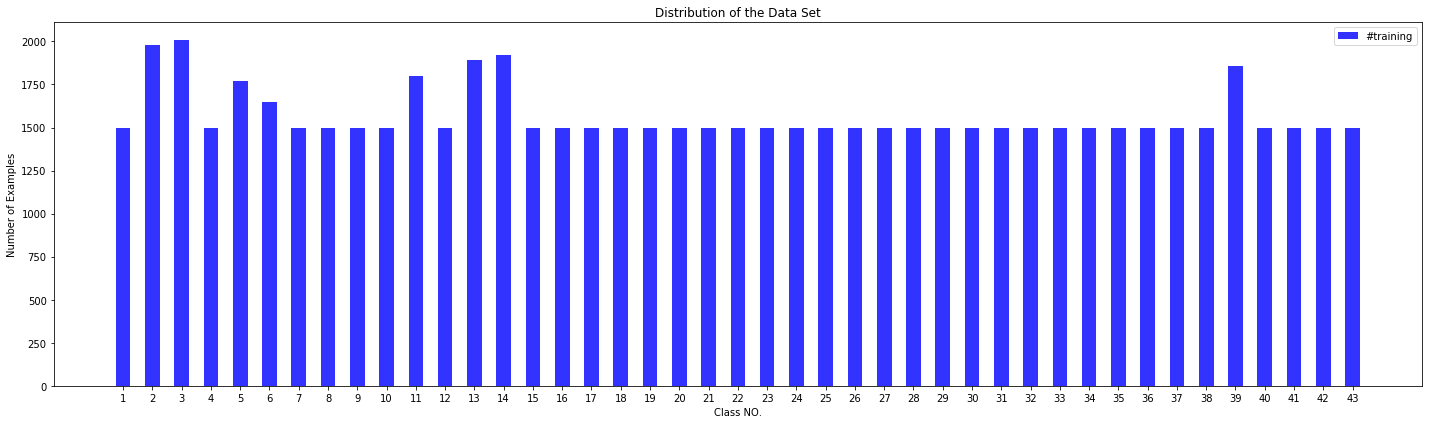

In [50]:
print('X, y shapes:', X_train.shape, y_train.shape)

plt_histogram(X_train, y_train)

C:\Users\fuqiang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


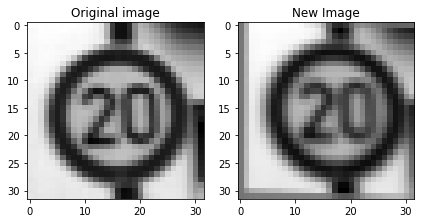

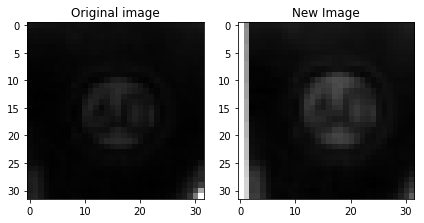

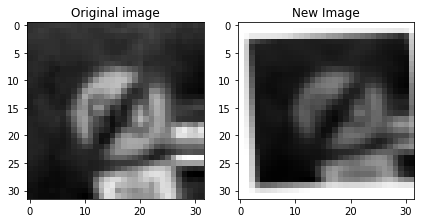

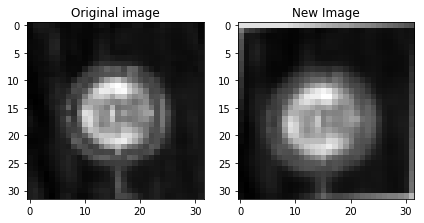

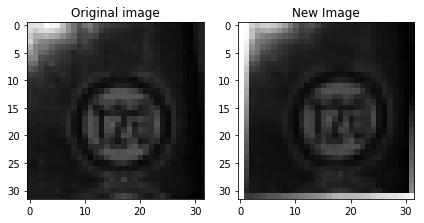

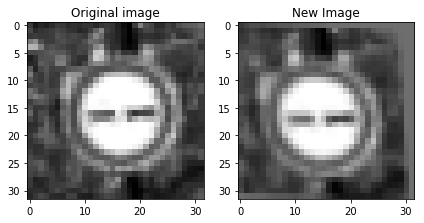

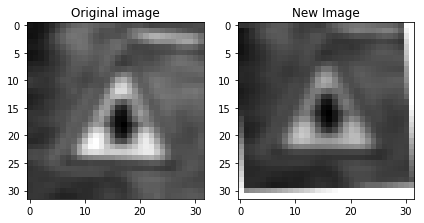

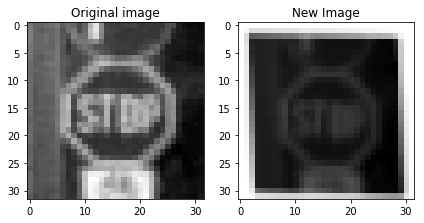

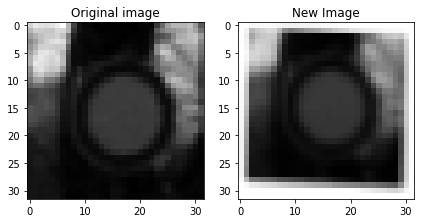

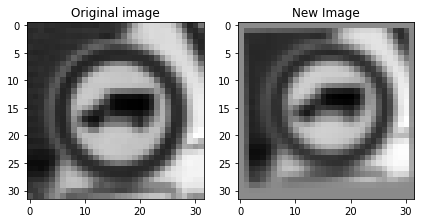

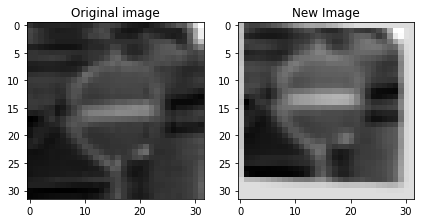

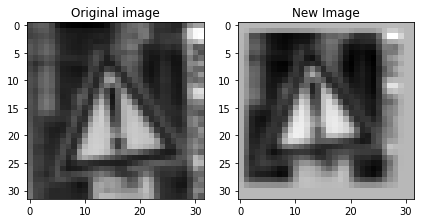

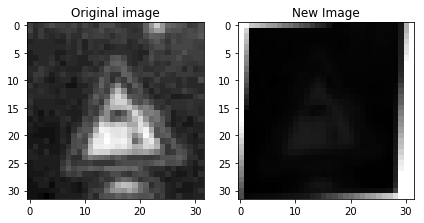

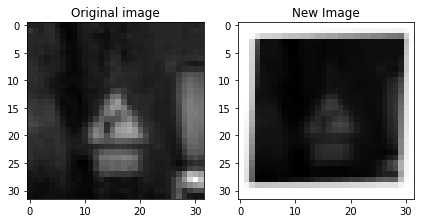

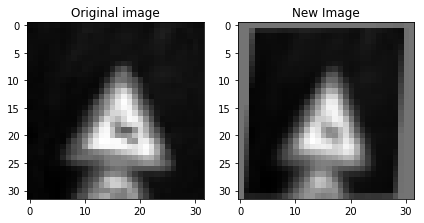

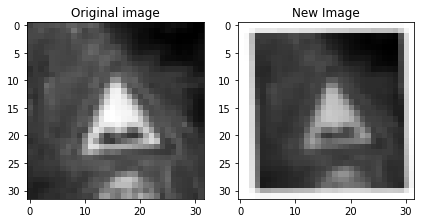

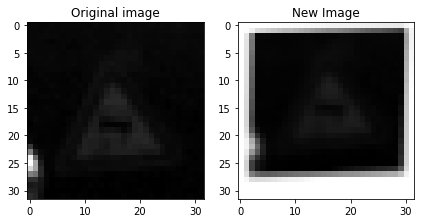

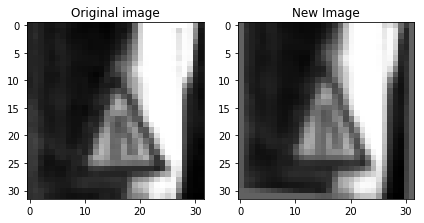

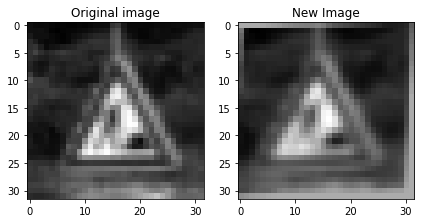

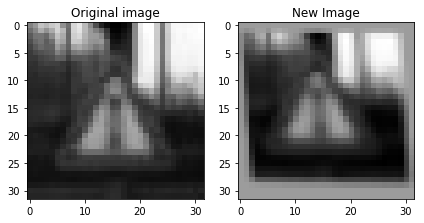

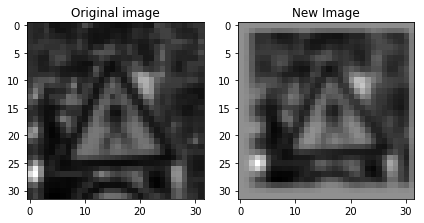

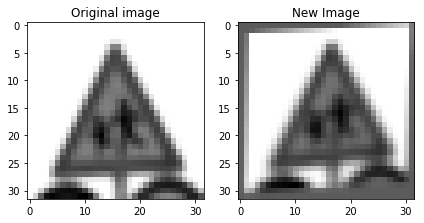

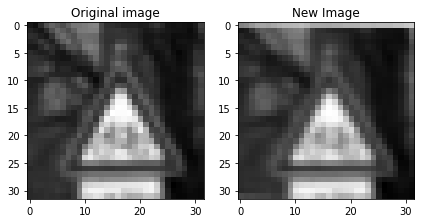

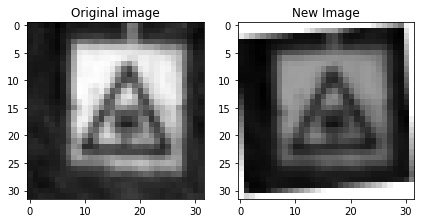

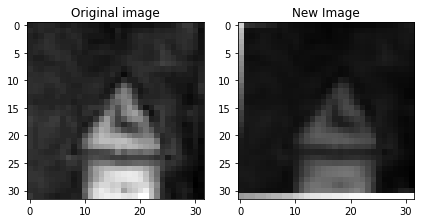

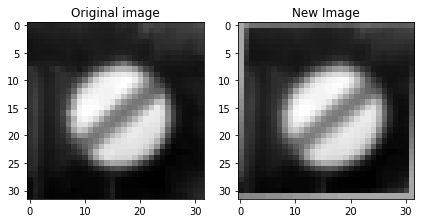

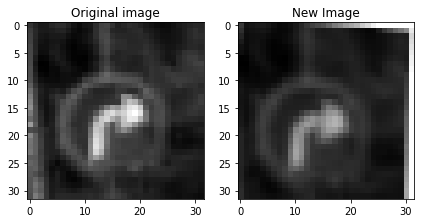

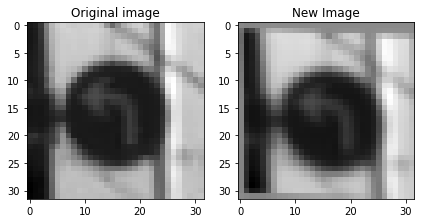

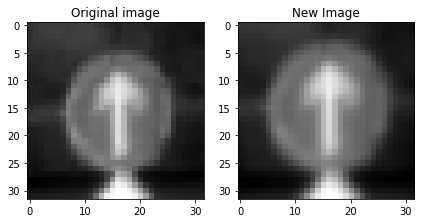

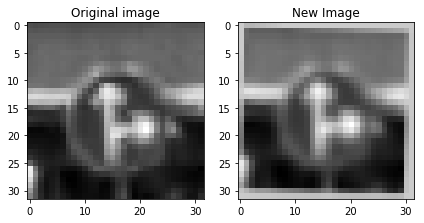

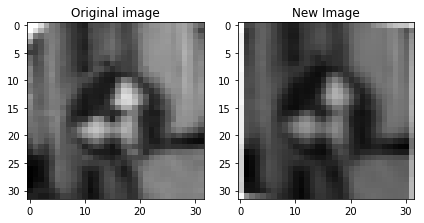

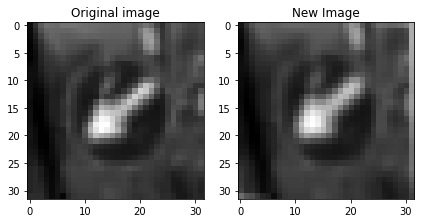

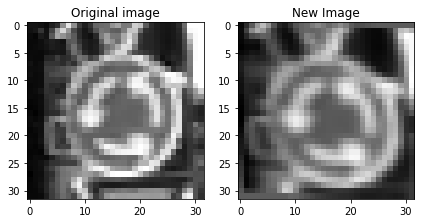

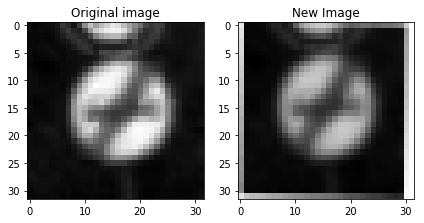

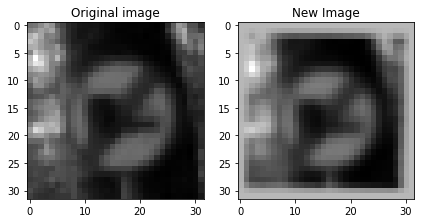

In [51]:
# For each class, we pick up one image and show its augmentation
for key in img_example_pre: # n_classes+1):

    img1 = img_example_pre[key]
    img2 = img_example_post[key]

    compare_images(img1, img2)

In [56]:
train_data_file = '../traffic-signs-data/train_1500.p'
train_data = dict()
train_data['features'] = X_train
train_data['labels'] = y_train

with open(train_data_file, mode='wb') as f:
    pickle.dump(obj=train_data, file=f)

#### shuffle the training data

In [52]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('Done!')

Done!


#### Training

In [53]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = LeNet_v3(x, keep_prob, hypar['mu'], hypar['sigma'])

In [54]:
print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (67380, 32, 32, 1) (67380,)


In [55]:
training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.780               0.746                54.1

                   2               0.890               0.851               107.7

                   3               0.923               0.864               161.6

                   4               0.946               0.902               215.5

                   5               0.958               0.919               269.2

                   6               0.967               0.931               322.6

                   7               0.972               0.932               376.5

                   8               0.976               0.947               430.4

                   9               0.980               0.944               484.0

                  10               0.983               0.948               537.4

                  11               0.987               0.951               591.2

    

## Step 2.3 Analysis and Improvement -- Modified LeNet Networks

<figure>
 <img src="examples/ModifiedLeNetModel.jpeg" width="800" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Modified LeNet Network </p> 
 </figcaption>

In [57]:
def SermanetModel(x, keep_prob, mu, sigma):    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # Dropout
    #conv1    = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout
    #conv2    = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') 

    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    conv2flat = flatten(conv2)
    
    # SOLUTION: Flatten. Input = 1x1x400. Output = 400.
    conv3flat = flatten(conv3)
    
    # SOLUTION: Concat conv2flat and conv3flat. Input = 400 + 400. Output = 800
    fc0 = tf.concat([conv2flat, conv3flat], 1)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, n_classes), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(n_classes))
    logits   = tf.matmul(fc0, fc1_W) + fc1_b
    
    return logits

print('done')

done


In [60]:
## training pipeline
def training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hyperparameter):
    rate = hyperparameter['rate']
    EPOCHS = hyperparameter['EPOCHS']
    BATCH_SIZE = hyperparameter['BATCH_SIZE']
    mu = hyperparameter['mu']
    sigma = hyperparameter['sigma']
    keep_prob_val = hyperparameter['keep_prob_val']
    
    ## training pipeline
    ## Create a training pipeline that uses the model to classify traffic sign
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = one_hot_y, logits = logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    ## model evaluation
    ## Evaluate how well the loss and accuracy of the model for a given dataset.
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()
    
    ## train the model
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        start_time = time.time()
        print()
        row_format = "{:>20}" * 4
        print(row_format.format("EPOCH", "Training_Accuracy", "Validation_Accuracy", "Time_Cost (s)"))
        row_format = "{:>20}{:>20.3f}{:>20.3f}{:>20.1f}"
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})

            train_accuracy = evaluate(X_train, y_train, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
            validation_accuracy = evaluate(X_valid, y_valid, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
            
            end_time = time.time()
            print(row_format.format(i+1, train_accuracy, validation_accuracy, end_time-start_time))
            
            #print("EPOCH {} ...".format(i+1))
            #print("Training Accurary = {:.3f} while Validation Accuracy = {:.3f}".format(train_accuracy, validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")
    
    
    ## Evaluate the Model
    # Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

In [62]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

hypar['keep_prob_val'] = 0.4

## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = SermanetModel(x, keep_prob, hypar['mu'], hypar['sigma'])

print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (67380, 32, 32, 1) (67380,)


In [63]:
training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.913               0.869                57.0

                   2               0.962               0.916               112.9

                   3               0.979               0.936               168.5

                   4               0.987               0.939               224.1

                   5               0.991               0.947               280.3

                   6               0.994               0.953               336.2

                   7               0.996               0.957               392.1

                   8               0.995               0.954               447.9

                   9               0.997               0.963               503.8

                  10               0.997               0.966               559.7

                  11               0.998               0.966               615.5

    

#### Adjusting the keep_prob parameter

In [92]:
# Hyperparameters
hypar = dict()

hypar['EPOCHS'] = 20
hypar['BATCH_SIZE'] = 128

hypar['mu'] = 0
hypar['sigma'] = 0.1

hypar['rate'] = 0.001

hypar['keep_prob_val'] = 0.3

## features and labels
# x is a placeholder for a batch of input images. 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

logits = SermanetModel(x, keep_prob, hypar['mu'], hypar['sigma'])

print('X, y shapes:', X_train.shape, y_train.shape)

X, y shapes: (67380, 32, 32, 1) (67380,)


In [93]:
training_pipeline(logits, x, y, keep_prob, X_train, y_train, X_valid, y_valid, hypar)

Training...

               EPOCH   Training_Accuracy Validation_Accuracy       Time_Cost (s)
                   1               0.909               0.866                59.5

                   2               0.963               0.906               117.6

                   3               0.976               0.929               176.0

                   4               0.984               0.936               233.9

                   5               0.988               0.948               291.9

                   6               0.990               0.955               348.8

                   7               0.993               0.960               408.1

                   8               0.995               0.963               466.5

                   9               0.996               0.957               524.8

                  10               0.997               0.965               582.3

                  11               0.997               0.969               640.8

    

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [94]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

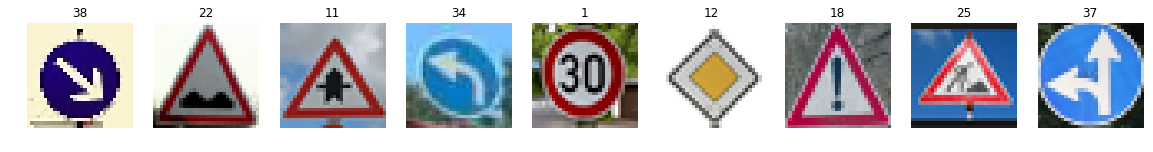

In [95]:
my_images = sorted(glob.glob('./new_images/*.png'))
my_y_test = np.array([38, 22, 11, 34, 1, 12, 18, 25, 37])

my_X_test_org = list()
plt.figure(figsize=[20,20])
for idx, img in enumerate(my_images):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    my_X_test_org.append(img)
    
    class_id = my_y_test[idx]
    plt.subplot(1, 9, idx+1)
    plt.imshow(img)
    plt.title(class_id)
    plt.axis('off')

### Predict the Sign Type for Each Image

In [96]:
my_X_test_org = np.asarray(my_X_test_org)
print(my_X_test_org.shape)

(9, 32, 32, 3)


In [97]:
my_X_test = np.sum(my_X_test_org/3, axis=3, keepdims=True)
my_X_test = (my_X_test - 128)/128
print(my_X_test.shape)

(9, 32, 32, 1)


INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet


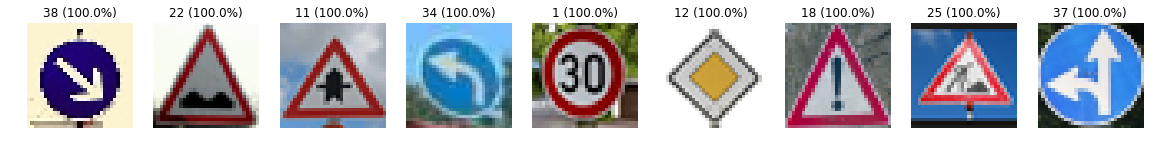

In [130]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

## features and labels

BATCH_SIZE = hypar['BATCH_SIZE']

my_accuracy = list()

for idx, img in enumerate(my_X_test):
    
    class_id = my_y_test[idx]
    
    single_X_test = list()
    single_Y_test = list()    
    
    single_X_test.append(img)
    single_X_test = np.asarray(single_X_test)
    single_Y_test.append(class_id)
    #print(single_X_test.shape)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        saver = tf.train.Saver()
        saver.restore(sess, "./lenet")

        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        test_accuracy = evaluate(single_X_test, single_Y_test, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
        my_accuracy.append(test_accuracy)
    
    # print("Image{} belonging to class {} is predicted as accuracy {:.3f}".format(idx, class_id, test_accuracy))
    
plt.figure(figsize=[20,20])
for idx, img in enumerate(my_images):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    class_id = my_y_test[idx]
    accuracy = my_accuracy[idx]
    
    plt.subplot(1, 9, idx+1)
    plt.imshow(img)
    plt.title("{} ({}%)".format(class_id, 100*accuracy))
    plt.axis('off')

In [129]:
print(my_accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Analyze Performance

In [111]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet")
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    test_accuracy = evaluate(my_X_test, my_y_test, x, y, keep_prob, accuracy_operation, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


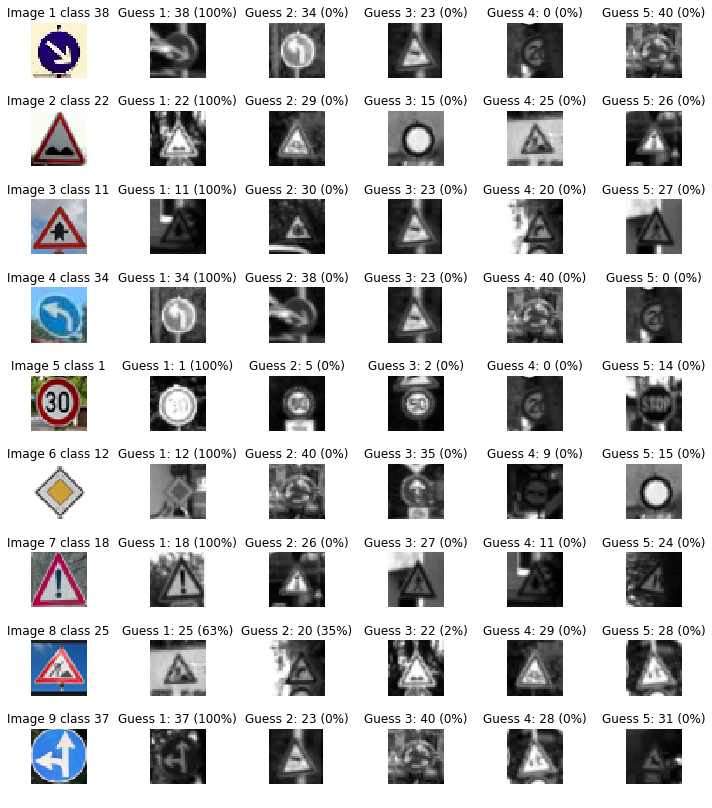

In [116]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
k_val = 5

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k = k_val)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet")
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_X_test, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_X_test, keep_prob: 1.0})
    
    fig, axs = plt.subplots(len(my_images), k_val+1, figsize=(12, 14))
    fig.subplots_adjust(hspace = .6, wspace = .6)
    axs = axs.ravel()
    
    for i, img in enumerate(my_images):
        img = cv2.imread(img)
        axs[(k_val+1)*i].axis('off')
        axs[(k_val+1)*i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[(k_val+1)*i].set_title('Image {} class {}'.format(i+1, my_y_test[i]))
        
        for j in range(k_val):
            guess_val = my_top_k[0][i][j]
            guess_index = my_top_k[1][i][j]
            img_index = np.argwhere(y_valid == guess_index)[0]
            
            axs[(k_val+1)*i+j+1].axis('off')
            axs[(k_val+1)*i+j+1].imshow(X_valid[img_index].squeeze(), cmap='gray')
            axs[(k_val+1)*i+j+1].set_title('Guess {}: {} ({:.0f}%)'.format(j+1, guess_index, 100*guess_val))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")